In [4]:
#importing neccesary libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('admission_data.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [7]:
df=df.drop("Serial No.",axis=1)

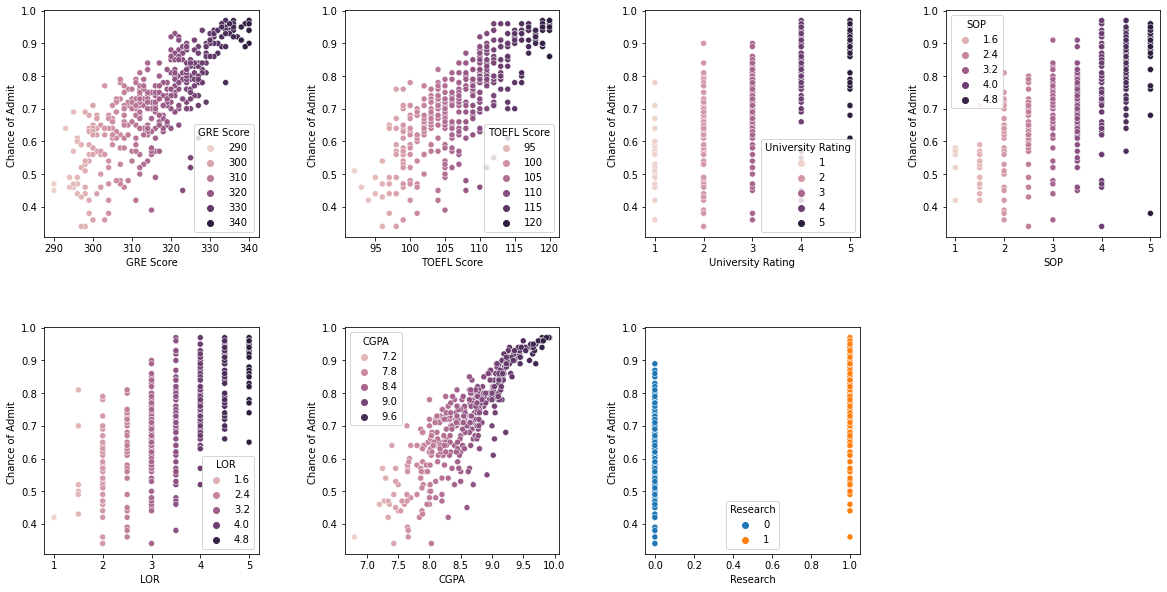

In [8]:
#plot scatter plots of Chance of Admission to each of the variables
column_names = list(df.columns)
column_names.pop(-1)
fig = plt.figure(figsize = (20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(0, len(column_names)):
    ax = fig.add_subplot(2, 4,i+1)
    sns.scatterplot(x = df[column_names[i]], y = df['Chance of Admit '], hue = df[column_names[i]] )

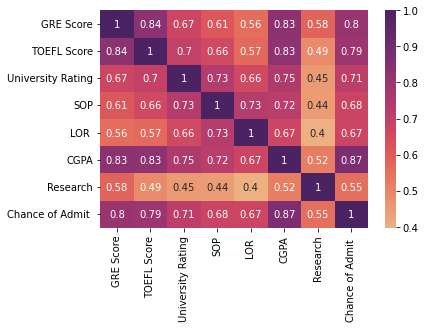

In [9]:
corr = df.corr()
#plot correlation matrix heatmap
hm = sns.heatmap(data = corr, annot = True, cmap = sns.color_palette("flare", as_cmap=True)
)

In [10]:
#Model Building
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [11]:
#splitting the data set
y = df['Chance of Admit ']
X = df.drop(columns = {'Chance of Admit '})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
linear_reg = LinearRegression()
Linear_regM = linear_reg.fit(X_train, y_train)

In [13]:
prediction = Linear_regM.predict(X_test)

In [14]:
prediction

array([0.64790571, 0.96718691, 0.72486698, 0.64382093, 0.65029963,
       0.83599789, 0.67472093, 0.8124184 , 0.68761158, 0.66687141,
       0.61611922, 0.8221281 , 0.46863056, 0.71294442, 0.73088975,
       0.75897012, 0.65024933, 0.91068607, 0.93234236, 0.55911418,
       0.59931055, 0.85553579, 0.68556466, 0.83812255, 0.71586875,
       0.74853643, 0.68789686, 0.69895858, 0.71379935, 0.70846414,
       0.76617515, 0.4837956 , 0.42348715, 0.55130786, 0.80203484,
       0.56606449, 0.82687317, 0.51777236, 0.69178139, 0.68033347,
       0.53811161, 0.70891195, 0.45955271, 0.78794137, 0.72584122,
       0.93151506, 0.81601041, 0.68880472, 0.95206973, 0.7038153 ,
       0.95661598, 0.74059879, 0.77024106, 0.75597956, 0.79751189,
       0.9295802 , 0.62880624, 0.62674039, 0.49950948, 0.66706272,
       0.88657284, 0.684064  , 0.85165709, 0.77082772, 0.59796656,
       0.71858009, 0.59030734, 0.63230633, 0.86292524, 0.92252511,
       0.61349418, 0.64537103, 0.78477603, 0.83865645, 0.68325

In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
mean_squared_error(prediction, y_test)

0.003411317812682631

In [22]:
#building another model using RandomForest
rdf = RandomForestRegressor()
rdfM = rdf.fit(X_train, y_train)
rdf_prediction = rdfM.predict(X_test)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [17]:
dct = DecisionTreeRegressor()
dctM = dct.fit(X_train, y_train)
dct_prediction = dctM.predict(X_test)
mean_squared_error(dct_prediction, y_test)

0.012201249999999997

In [23]:
mean_squared_error(rdf_prediction, y_test)

0.0033216374999999994

In [25]:
import pickle 

filename = "admission_model.sav"

pickle.dump(Linear_regM, open(filename, "wb"))